In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
import pathlib

In [3]:
train_dir = pathlib.Path("C:/Users/tamar/Downloads/archive (1)/images/train")
test_dir = pathlib.Path("C:/Users/tamar/Downloads/archive (1)/images/test")

In [4]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [5]:
train_data = generator.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = generator.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 532 images belonging to 8 classes.
Found 167 images belonging to 8 classes.


In [6]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"


In [7]:
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [8]:
from tensorflow.keras import layers

In [9]:
resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(8, activation='softmax', name='output_layer') # create our own output layer
  ])

In [10]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [11]:
resnet_model_history = resnet_model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/5
17/17 [==============================] - 63s 3s/step - loss: 1.3367 - accuracy: 0.5658 - val_loss: 0.8217 - val_accuracy: 0.7186
Epoch 2/5
17/17 [==============================] - 47s 3s/step - loss: 0.5013 - accuracy: 0.8421 - val_loss: 0.6020 - val_accuracy: 0.8024
Epoch 3/5
17/17 [==============================] - 52s 3s/step - loss: 0.3552 - accuracy: 0.8797 - val_loss: 0.5145 - val_accuracy: 0.8563
Epoch 4/5
17/17 [==============================] - 49s 3s/step - loss: 0.2569 - accuracy: 0.9286 - val_loss: 0.4588 - val_accuracy: 0.8802
Epoch 5/5
17/17 [==============================] - 61s 4s/step - loss: 0.2005 - accuracy: 0.9380 - val_loss: 0.4956 - val_accuracy: 0.8623


In [12]:
resnet_model.evaluate(test_data)

6/6 [==============================] - 12s 2s/step - loss: 0.5532 - accuracy: 0.8443


[0.5531556606292725, 0.8443113565444946]

<AxesSubplot:>

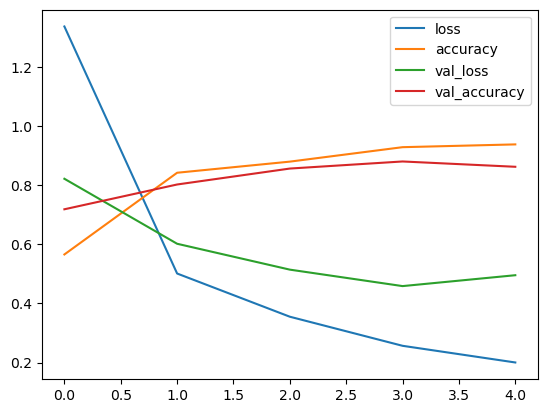

In [14]:
pd.DataFrame(resnet_model_history.history).plot()

In [15]:
img0="star1.jpeg"
img1='gold.jpeg'
img2='harbor.jpg'
img3='jelly.jpeg'
img4='lobster.jpeg'
img5='oyster.jpeg'
img6='seatur.jpeg'
img7="squid.jpeg"



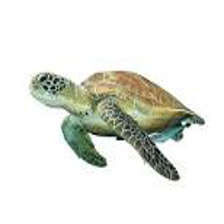

In [16]:
import PIL.Image as Image
pred_image=Image.open(img6).resize((224,224))
pred_image

In [17]:
pred_image=np.array(pred_image)/255.0


In [18]:
result1 = resnet_model.predict(pred_image[np.newaxis,...])
max=np.argmax(result1)

1/1 [==============================] - 1s 691ms/step


In [19]:
max

5

In [20]:
res=["GOld Fish","Harbor Heal","Jelly Fish","Lobster","Oyster","Sea Turtle","Squid","Star Fish"]

In [21]:
res[max]

'Sea Turtle'

In [22]:
resnet_model.save("C:/Users/tamar/Downloads/varun/model.h5")

C:\Users\tamar\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
